In [1]:
!pip install pandas dask scikit-learn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
#####################################
#  IMPORT DEPENDENCIES
#####################################
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import sklearn

print("Imports Successful")

Imports Successful


In [5]:
# Import the dataset:
credit_df = pd.read_csv("Credit-Card-Purchases.csv")
credit_df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
###################################
# METADATA RETRIEVVAL METHOD
###################################
def get_metadata(df) :
    #  Sanity Check (raise TypeError):
    if not isinstance(df, pd.DataFrame) :
        raise TypeError("ERROR: Not a Pandas DataFrame object")

    # Column (feature) names:
    col_names = df.columns

    # Column (feature) types:
    col_dtypes = df.dtypes
    dtypes_list = []
    for i in range(0, len(col_dtypes)) :
        dtypes_list.append(col_dtypes.iloc[i])

    # Missing Values by Column:
    col_missing = df.isna().sum()

    # Metadata DataFrame:
    metadata_df = pd.DataFrame({
        "column_names": col_names,
        "column_dtypes": dtypes_list,
        "column_missing": col_missing,
    }).reset_index(drop=True)

    return metadata_df




In [14]:
#######################################################
# EXTRACT METADATA, PUBLISH AS CSV FILE
#######################################################
metadata_df = get_metadata(df=credit_df)
metadata_df = metadata_df.sort_values(by=["column_missing"], ascending=False)
metadata_df.to_csv("metadata.csv")

In [15]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [19]:
numeric_df = credit_df.select_dtypes(include="number")
corr = numeric_df.corr()
# cov = numeric_df.cov()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [31]:
corr.style.background_gradient(cmap="seismic_r").format(precision=2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.00,0.32,0.18,0.16,0.13,0.50,-0.08,0.07,-0.06,0.45,0.39,0.15,0.53,0.32,0.40,-0.32,0.07
BALANCE_FREQUENCY,0.32,1.00,0.13,0.10,0.12,0.10,0.23,0.20,0.18,0.19,0.14,0.19,0.10,0.07,0.13,-0.10,0.12
PURCHASES,0.18,0.13,1.00,0.92,0.68,-0.05,0.39,0.50,0.32,-0.12,-0.07,0.69,0.36,0.60,0.09,0.18,0.09
ONEOFF_PURCHASES,0.16,0.10,0.92,1.00,0.33,-0.03,0.26,0.52,0.13,-0.08,-0.05,0.55,0.32,0.57,0.05,0.13,0.06
INSTALLMENTS_PURCHASES,0.13,0.12,0.68,0.33,1.00,-0.06,0.44,0.21,0.51,-0.13,-0.07,0.63,0.26,0.38,0.13,0.18,0.09
CASH_ADVANCE,0.50,0.10,-0.05,-0.03,-0.06,1.00,-0.22,-0.09,-0.18,0.63,0.66,-0.08,0.30,0.45,0.14,-0.15,-0.07
PURCHASES_FREQUENCY,-0.08,0.23,0.39,0.26,0.44,-0.22,1.00,0.50,0.86,-0.31,-0.20,0.57,0.12,0.10,0.00,0.31,0.06
ONEOFF_PURCHASES_FREQUENCY,0.07,0.20,0.50,0.52,0.21,-0.09,0.50,1.00,0.14,-0.11,-0.07,0.54,0.30,0.24,-0.03,0.16,0.08
PURCHASES_INSTALLMENTS_FREQUENCY,-0.06,0.18,0.32,0.13,0.51,-0.18,0.86,0.14,1.00,-0.26,-0.17,0.53,0.06,0.09,0.03,0.25,0.07
CASH_ADVANCE_FREQUENCY,0.45,0.19,-0.12,-0.08,-0.13,0.63,-0.31,-0.11,-0.26,1.00,0.80,-0.13,0.13,0.18,0.10,-0.25,-0.13


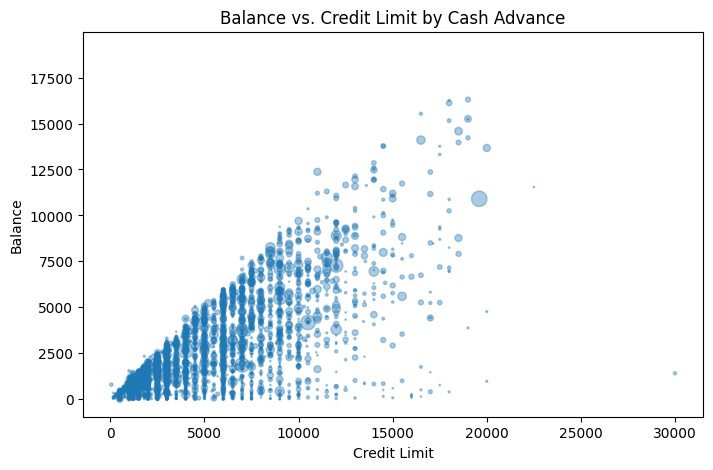

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))
ax.scatter(numeric_df["CREDIT_LIMIT"], numeric_df["BALANCE"], s=numeric_df["CASH_ADVANCE_TRX"], alpha=0.377)
ax.set_title("Balance vs. Credit Limit by Cash Advance")
ax.set_xlabel("Credit Limit")
ax.set_ylabel("Balance")
fig.savefig("scatterplot.png", dpi=500)

(array([4.583e+03, 2.095e+03, 1.326e+03, 5.780e+02, 2.150e+02, 1.090e+02,
        3.300e+01, 6.000e+00, 1.000e+00, 3.000e+00]),
 array([   50.,  3045.,  6040.,  9035., 12030., 15025., 18020., 21015.,
        24010., 27005., 30000.]),
 <BarContainer object of 10 artists>)

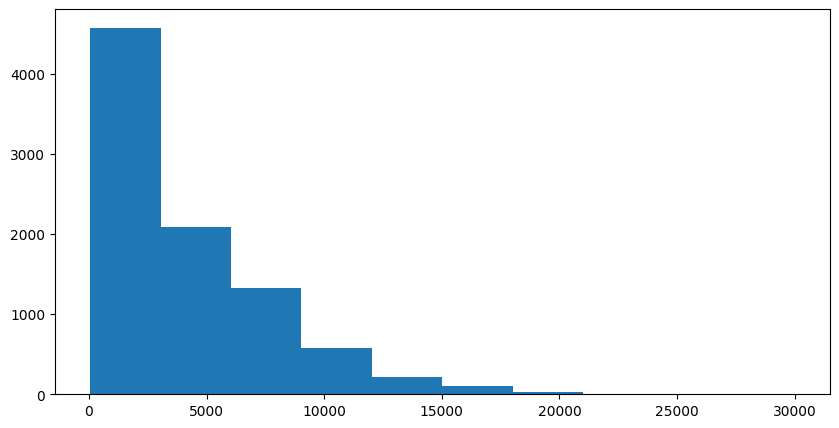

In [50]:
#####################################
# HISTOGRAM PLOT
#####################################
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.hist(numeric_df["CREDIT_LIMIT"])

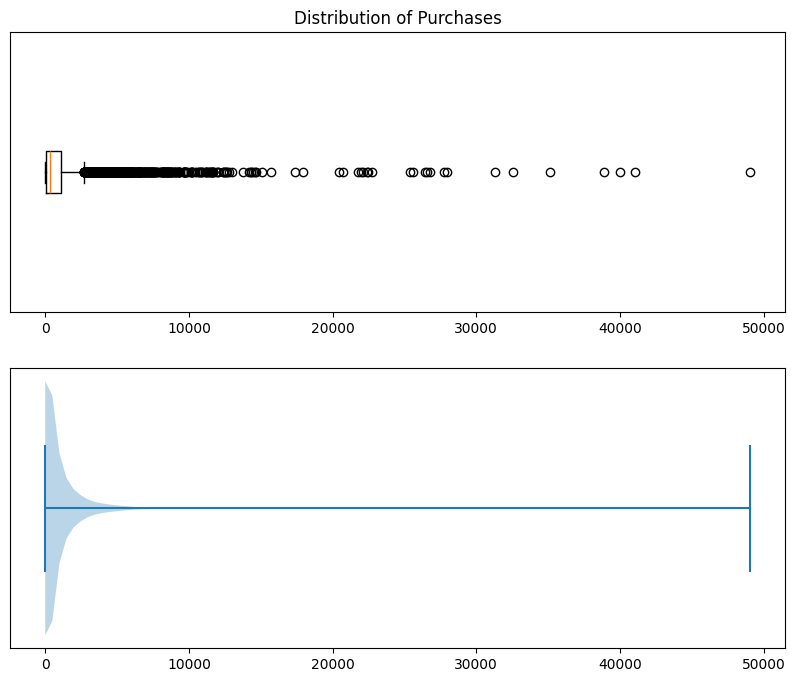

In [56]:
#########################################
# BOXPLOT & VIOLIN PLOT
#########################################
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# First (top) subplot
ax[0].boxplot(numeric_df["PURCHASES"], vert=False)
ax[0].axes.get_yaxis().set_visible(False)
# Bottom subplot
ax[1].violinplot(numeric_df["PURCHASES"], vert=False)
ax[1].axes.get_yaxis().set_visible(False)
ax[0].set_title("Distribution of Purchases")
fig.savefig("distribution_purchases.png", dpi=500)